In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import rcParams
from helita.sim import rh15d
import os
import xarray as xr
from scipy.integrate.quadrature import cumtrapz
from scipy.interpolate import interp1d
import astropy.constants as const
from helita.utils.utilsmath import planck, voigt
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
import scipy.io
import h5py

#parameter setup & plot dir
obs_plot = True #plot IRIS observation
data0_plot = True #plot current RH result

data1 = rh15d.Rh15dout("/Users/yjzhu/Desktop/Solar/Num/rh15d_mg/rh15d/5F11_kowalski2017_v5_mu0.77_t=4_ls_mu0.2/output")
intensity1 = data1.ray.intensity
print(intensity1)
#data2 = rh15d.Rh15dout("/mnt/yzhu/rh15d/rh15d_mpi/5F11_pt1s_complete_nb_llls_tri/output")
data2 = rh15d.Rh15dout("/Users/yjzhu/Desktop/Solar/Num/rh15d_mg30/rh15d/5F11_kowalski2017_v5_mu0.77_t=4_ls_mu0.2/output")
intensity2 = data2.ray.intensity
if obs_plot:
    wvl_obs = scipy.io.readsav('/Volumes/yjzhu/output/iris_new.sav')['wvl']
    iris_int = scipy.io.readsav('/Volumes/yjzhu/output/iris_new.sav')['lp_rad']*36
    #iris_int = scipy.io.readsav('/mnt/yzhu/output/iris_intensity_hui.sav')['lp']
#data1 = airtovacuum(data1)
if data0_plot:
    data0 = rh15d.Rh15dout( "/Volumes/yjzhu/rh15d_mg/rh15d_mpi/5F11_kowalski2017_v5_mu0.77_t=4_ls/output")
    intensity0 = data0.ray.intensity
    
    data01 = rh15d.Rh15dout("/Volumes/yjzhu/rh15d_mgl/rh15d_mpi/5F11_pt1s_nb_599/output")
    intensity01 = data01.ray.intensity

/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))


--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mg/rh15d/5F11_kowalski2017_v5_mu0.77_t=4_ls_mu0.2/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mg/rh15d/5F11_kowalski2017_v5_mu0.77_t=4_ls_mu0.2/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mg/rh15d/5F11_kowalski2017_v5_mu0.77_t=4_ls_mu0.2/output/output_ray.hdf5 file.
<xarray.DataArray 'intensity' (x: 2, y: 1, wavelength: 7878)>
array([[[2.192076e-12, 2.783048e-12, ..., 2.213594e-08, 2.086001e-08]],

       [[2.194582e-12, 2.786298e-12, ..., 2.213519e-08, 2.085996e-08]]],
      dtype=float32)
Coordinates:
  * wavelength  (wavelength) float64 22.79 26.39 28.0 ... 4.053e+03 4.054e+03
  * x           (x) float64 210.0 211.0
  * y           (y) float64 0.0
Attributes:
    units:    W / (Hz m2 sr)
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mg30/rh15d/5F11_kowalski2017_v5_mu0.77_t=4_ls_mu0.2/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mg30/rh15d/5F11_

/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  self.ray = xr.open_dataset(infile, autoclose=True)


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/yjzhu/output/iris_new.sav'

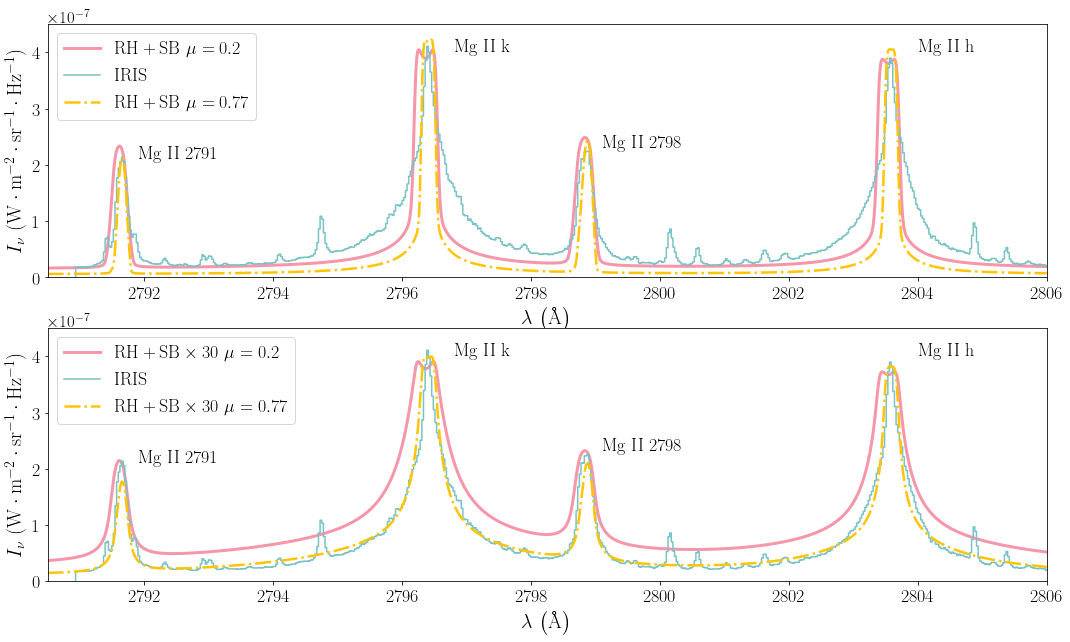

In [9]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,9))
ln1, = ax1.plot(intensity1.coords['wavelength']*10,intensity1[0,0],
                color = '#F596AA',label=r'$\mathrm{RH+SB}\ \mu=0.2$',linewidth=3)
ln2, = ax1.step(wvl_obs + 0.025,iris_int,where = 'mid',color = '#78C2C4',label=r'$\mathrm{IRIS}$')
ln3, = ax1.plot(intensity0.coords['wavelength']*10,intensity0[0,0],color = '#FFC408',label=r'$\mathrm{RH+SB}\ \mu=0.77$',ls='-.',linewidth=2.5)
ax1.set_xlabel(r'$\lambda \ \mathrm{\left(\AA\right)}$',fontsize = 20)
ax1.set_ylabel(r'$I_{\nu}\ (\mathrm{W\cdot m^{-2} \cdot sr^{-1} \cdot Hz^{-1}})$', fontsize = 20)
ax1.set_xlim([2790.5,2806]) #select spectrum wavelength interval
ax1.tick_params(labelsize=18)


ln4, = ax2.plot(intensity2.coords['wavelength']*10,intensity2[0,0],
                color = '#F596AA',label=r'$\mathrm{RH+SB}\times30\ \mu=0.2$',linewidth=3)
ln5, = ax2.step(wvl_obs + 0.025,iris_int,where='mid',color='#78C2C4',label=r'$\mathrm{IRIS}$')
ln6, = ax2.plot(intensity01.coords['wavelength']*10,intensity01[0,0],color = '#FFC408',label=r'$\mathrm{RH+SB}\times30\ \mu=0.77$',ls='-.',linewidth=2.5)
ax2.set_xlabel(r'$\lambda \ \mathrm{\left(\AA\right)}$',fontsize = 20)
ax2.set_ylabel(r'$I_{\nu}\ (\mathrm{W\cdot m^{-2}\cdot sr^{-1} \cdot Hz^{-1}})$', fontsize = 20)
ax2.set_xlim([2790.5,2806]) #select spectrum wavelength interval
ax2.tick_params(labelsize=18)

leg = [ln1,ln2,ln3]
ax1.legend(leg,[leg_.get_label() for leg_ in leg],loc='upper left',fontsize=18)

leg = [ln4,ln5,ln6]
ax2.legend(leg,[leg_.get_label() for leg_ in leg],loc='upper left',fontsize=18)

for ax_ in [ax1,ax2]:
    ax_.set_ylim(0,4.5e-7)
    ax_.yaxis.get_offset_text().set_fontsize(17)
    ax_.text(2804.0,4e-7,r'$\mathrm{Mg\ II\ h}$',fontsize=18)
    ax_.text(2799.1,2.3e-7,r'$\mathrm{Mg\ II\ 2798}$',fontsize=18)
    ax_.text(2796.8,4e-7,r'$\mathrm{Mg\ II\ k}$',fontsize=18)
    ax_.text(2791.9,2.1e-7,r'$\mathrm{Mg\ II\ 2791}$',fontsize=18)
    
plt.subplots_adjust(bottom = 0.09,left=0.05,right=0.975,top=0.95)
plt.savefig(fname = '../figs/MgII_mu0.2.eps', dpi = 300, format = 'eps')
#plt.savefig(fname = 'figs/png/MgII_SB_new.png', dpi = 300, format = 'png')